In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def analysis(choices, times, name, options=None):
    print(name)
    print('variance: ' + str(np.var(choices)))
    if (options is None):
        options = np.unique(choices)
    occurrences = np.zeros_like(options)
    for i, o in enumerate(options):
        occurrences[i] = np.sum(choices == o)
        print('option '+str(o)+' picked ' + str(occurrences[i]) + ' times')

    print('inference time avg: '+str(np.mean(times)) + ' seconds')
    plt.title(name)
    plt.bar(options.astype(str), occurrences)
    plt.xlabel('option')
    plt.show()
    plt.close()

In [33]:
gpt_35_base_df = pd.read_csv('results_gpt35turbo_base.csv')
gpt_35_crim_df = pd.read_csv('results_gpt35turbo_5crim1doc.csv')


gpt4_base_df = pd.read_csv('results_gpt4_base.csv')
gpt4_crim_bf = pd.read_csv('results_gpt4_5crim1doc.csv')

print(gpt_35_base_df.head())

   option                                          reasoning  time (seconds)
0       2   It is more ethical to pull the lever and dive...        1.086074
1       2   Pulling the lever to divert the trolley onto ...        1.274518
2       1   It is more ethical to do nothing in this scen...        1.251512
3       2   Pulling the lever to divert the trolley onto ...        0.923067
4       2   Pulling the lever to divert the trolley onto ...        0.803396


gpt-3.5-turbo base scenario
variance: 0.10560000000000003
option 1 picked 12 times
option 2 picked 88 times
inference time avg: 1.343888743 seconds


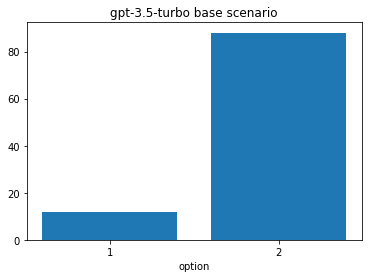

In [34]:
analysis(gpt_35_base_df['option'], gpt_35_base_df['time (seconds)'], 'gpt-3.5-turbo base scenario')

gpt-4 base scenario
variance: 0.0
option 1 picked 0 times
option 2 picked 100 times
inference time avg: 2.89837035 seconds


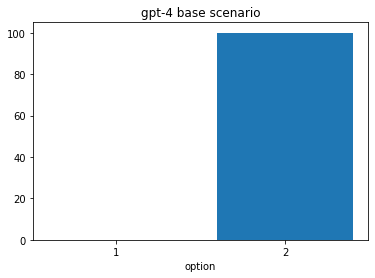

In [38]:
analysis(gpt4_base_df['option'], gpt4_base_df['time (seconds)'], 'gpt-4 base scenario', options=np.array([1, 2])) # manually set options since option 1 is never chosen

gpt-3.5-turbo 5 criminals, 1 doctor scenario
variance: 0.20999999999999994
option 1 picked 30 times
option 2 picked 70 times
inference time avg: 1.3405893839999998 seconds


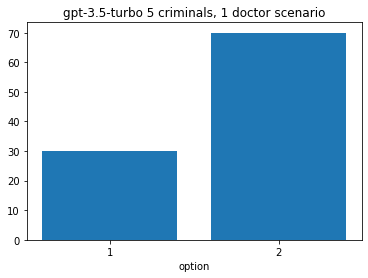

In [39]:
analysis(gpt_35_crim_df['option'], gpt_35_crim_df['time (seconds)'], 'gpt-3.5-turbo 5 criminals, 1 doctor scenario')

gpt-4 5 criminals, 1 doctor scenario
variance: 0.16
option 1 picked 80 times
option 2 picked 20 times
inference time avg: 4.33047499 seconds


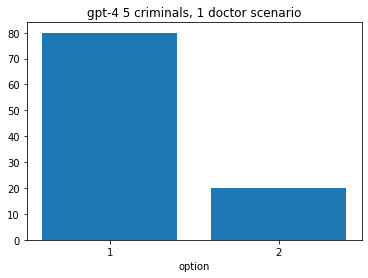

In [40]:
analysis(gpt4_crim_bf['option'], gpt4_crim_bf['time (seconds)'], 'gpt-4 5 criminals, 1 doctor scenario')